In [1]:
import time
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, LSTM, GRU
from keras.models import Model, load_model
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
tf.__version__


#import seaborn as sns
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import confusion_matrix, precision_recall_curve
#from sklearn.metrics import recall_score, classification_report, auc, roc_curve
#from sklearn.metrics import precision_recall_fscore_support, f1_score
#from sklearn.preprocessing import StandardScaler
#from pylab import rcParams
tf.__version__

Using TensorFlow backend.


'1.8.0'

# Model Name

In [2]:
name = "ABS_Keras-GRU254GRU128D32D2-adam{}".format(int(time.time()))
#name_noTime = "ABS_Keras-LSTM128LSTM128D32D2-adam"

# Choose default months & paths, columns(features) and number of loans to load, train/test split

In [3]:
#parameters to choose

default_months = 6
nrows = 1000000
train_split = 0.90
model = keras
path = 'c:/users/ugy1/abs/'
rows_for_prediction = 1000
cutOfffForOriginationDate='2012-01-01'

use_columns = ['abs_loan.originationdate', 'abs_loan.originalloanamount','abs_loan.originalloanterm',
'abs_loan.originalinterestratepercentage','abs_loan.subvented','abs_loan.vehiclenewusedcode','abs_loan.vehiclevalueamount',
'abs_loan.obligorcreditscore','abs_loan.obligorincomeverificationlevelcode','abs_loan.obligoremploymentverificationcode',
'abs_loan.paymenttoincomepercentage','abs_loan.remainingtermtomaturitynumber',
'abs_loan.reportingperiodbeginningloanbalanceamount','abs_loan.nextreportingperiodpaymentamountdue',
'abs_loan.reportingperiodinterestratepercentage','abs_loan.nextinterestratepercentage',
'abs_loan.servicingfeepercentage','abs_loan.otherservicerfeeretainedbyservicer',
'abs_loan.otherassesseduncollectedservicerfeeamount','abs_loan.scheduledinterestamount', 
'abs_loan.scheduledprincipalamount','abs_loan.otherprincipaladjustmentamount',
'abs_loan.reportingperiodactualendbalanceamount','abs_loan.reportingperiodscheduledpaymentamount',
'abs_loan.totalactualamountpaid','abs_loan.actualinterestcollectedamount','abs_loan.actualprincipalcollectedamount',
'abs_loan.actualothercollectedamount','abs_loan.serviceradvancedamount', 'abs_loan.currentdelinquencystatus']

# GPU Options

In [4]:
#set gpu options to adjust gpu usage
# gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.5)
# sess=tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

# Load data

In [5]:
#load data from tab delimited file
df=pd.read_csv(path+'datasets/s3tab/abs_loan.csv', 
               #usecols=column_list, 
               sep='\t',
               nrows=nrows,
               low_memory=False, 
              #index_col='abs_loan.originationdate', 
               parse_dates=True
              )
#display data shape
print(df.shape)

(1000000, 74)


In [6]:
#view first five rows of all columns
df.head(n=10)

,abs_loan.cik,abs_loan.accessionnumber,abs_loan.assettypenumber,abs_loan.assetnumber,abs_loan.reportingperiodbeginningdate,abs_loan.reportingperiodendingdate,abs_loan.originatorname,abs_loan.originationdate,abs_loan.originalloanamount,abs_loan.originalloanterm,...,abs_loan.repurchaseamount,abs_loan.demandresolutiondate,abs_loan.repurchasername,abs_loan.repurchasereplacementreasoncode,abs_loan.chargedoffprincipalamount,abs_loan.recoveredamount,abs_loan.modificationtypecode,abs_loan.paymentextendednumber,abs_loan.repossessedindicator,abs_loan.repossessedproceedsamount
0,1725617,0000929638-18-000030,BMW2018-A,1001536189,2017-11-01,2017-11-30,BMW Bank of North America,2012-12-31,25124.50,72,...,0.0,NaN,NaN,[],0.0,0.0,[],NaN,False,0.0
1,1725617,0000929638-18-000030,BMW2018-A,1001536759,2017-11-01,2017-11-30,BMW Bank of North America,2012-12-31,43257.34,72,...,0.0,NaN,NaN,[],0.0,0.0,[],NaN,False,0.0
2,1725617,0000929638-18-000030,BMW2018-A,1001536970,2017-11-01,2017-11-30,BMW Bank of North America,2012-12-31,56917.54,72,...,0.0,NaN,NaN,[],0.0,0.0,[],NaN,False,0.0
3,1725617,0000929638-18-000030,BMW2018-A,1001537061,2017-11-01,2017-11-30,BMW Bank of North America,2012-12-31,42003.57,72,...,0.0,NaN,NaN,[],0.0,0.0,[],NaN,False,0.0
4,1725617,0000929638-18-000030,BMW2018-A,1001537088,2017-11-01,2017-11-30,BMW Bank of North America,2012-12-31,77217.85,72,...,0.0,NaN,NaN,[],0.0,0.0,[],NaN,False,0.0
5,1725617,0000929638-18-000030,BMW2018-A,1001538073,2017-11-01,2017-11-30,BMW Bank of North America,2012-12-31,27784.19,72,...,0.0,NaN,NaN,[],0.0,0.0,[],NaN,False,0.0
6,1725617,0000929638-18-000030,BMW2018-A,1001538680,2017-11-01,2017-11-30,BMW Bank of North America,2012-12-31,43397.80,72,...,0.0,NaN,NaN,[],0.0,0.0,[],NaN,False,0.0
7,1725617,0000929638-18-000030,BMW2018-A,1001565943,2017-11-01,2017-11-30,BMW Bank of North America,2013-02-28,49345.92,72,...,0.0,NaN,NaN,[],0.0,0.0,[],NaN,False,0.0
8,1725617,0000929638-18-000030,BMW2018-A,1001566705,2017-11-01,2017-11-30,BMW Bank of North America,2013-02-28,45763.89,66,...,0.0,NaN,NaN,[],0.0,0.0,[],NaN,False,0.0
9,1725617,0000929638-18-000030,BMW2018-A,1001566738,2017-11-01,2017-11-30,BMW Bank of North America,2013-02-28,45756.02,72,...,0.0,NaN,NaN,[],0.0,0.0,[],NaN,False,0.0


In [7]:
#remove 'abs_loan.' string from columns because dot is a command in pandas
df.columns=df.columns.str.replace('abs_loan.','')

# Function to Draw Bar chart

In [8]:
#function to draw a bar chart 
def draw(data, title, ylabel, sort = False):
    labels = pd.value_counts(data).index.tolist()
    count_classes = pd.value_counts(data, sort)
    count_classes.plot(kind = 'bar', rot=0)
    plt.xticks(range(len(labels)), labels)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.show()
    print(pd.value_counts(data))

# Reporting Period

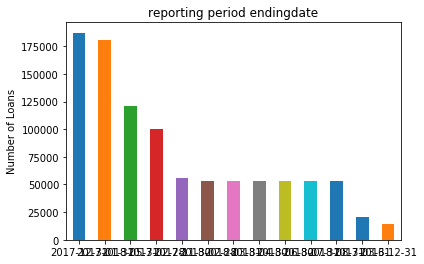

2017-12-31    187183
2017-01-31    180685
2018-05-31    120631
2017-02-28     99972
2017-11-30     55710
2018-02-28     53447
2018-03-31     53443
2018-04-30     53442
2018-06-30     53437
2018-07-31     53436
2018-08-31     53398
2017-03-31     20737
2016-12-31     14479
Name: reportingperiodendingdate, dtype: int64


In [9]:
draw(df.reportingperiodendingdate, title='reporting period endingdate', ylabel='Number of Loans', sort = True)

In [10]:
#df=df[df.reportingperiodendingdate=='2017-11-30']

# Create Features for Reporting period

In [11]:
# create feature columns for categories within originator name 
def map_reportingperiodendingdate(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.reportingperiodendingdate).index.tolist()

for code in codes:
        df['reportingperiodending_{}'.format(code)] = list(map(map_reportingperiodendingdate, df.reportingperiodendingdate))


In [12]:
df.shape

(1000000, 87)

# Number of Days Loans Outstanding

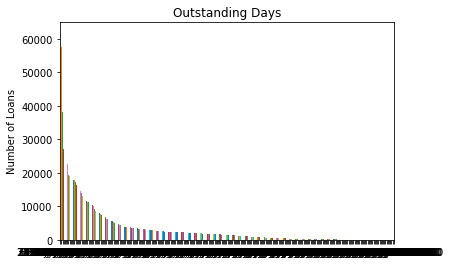

31 days      61820
0 days       57592
61 days      38272
245 days     26971
275 days     25217
365 days     24866
92 days      22566
273 days     19270
426 days     18960
577 days     18486
334 days     18322
304 days     17953
151 days     17829
212 days     17305
214 days     16357
396 days     16156
306 days     16013
243 days     14532
638 days     13890
669 days     13195
59 days      12245
120 days     12042
181 days     11727
546 days     11406
730 days     11197
608 days     10968
62 days      10622
516 days     10402
457 days     10065
90 days       9279
             ...  
2253 days       39
2222 days       39
2103 days       37
2252 days       32
2376 days       31
2283 days       29
2406 days       28
2467 days       26
2100 days       26
2437 days       25
1947 days       25
2498 days       23
2068 days       21
2133 days       19
2343 days       19
1976 days       18
1915 days       18
1854 days       18
2164 days       17
2312 days       14
2557 days       12
2526 days   

In [13]:
#calculate outstanding days
df['outstandingdays'] = pd.to_datetime(df['reportingperiodendingdate'])-pd.to_datetime(df['originationdate'])
#draw a chart for visual look and analysis
draw(df.outstandingdays, title='Outstanding Days', ylabel='Number of Loans', sort = True)

In [14]:
#remove days string for machine learning
df['outstandingdays']=df.outstandingdays.map(lambda x: np.nan if pd.isnull(x) else x.days)
#display last five rows
df.outstandingdays.tail()

999995    396
999996    365
999997    396
999998    396
999999    365
Name: outstandingdays, dtype: int64

In [15]:
# retaining only loans with non-negative outstanding days
u=pd.value_counts(df.outstandingdays<0)
if len(u)<2:
    print('No Loans Below zero outstanding days')
else: 
    print('Number of Loans with negative outstanding days :', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with only non-negative outstanding days')
    df=df[df.outstandingdays>0]   

No Loans Below zero outstanding days


In [16]:
# get statistics for outstanding days
df.outstandingdays.describe()

count    1000000.000000
mean         476.152630
std          460.655651
min            0.000000
25%          151.000000
50%          335.000000
75%          638.000000
max         2618.000000
Name: outstandingdays, dtype: float64

# Days Left until Maturity

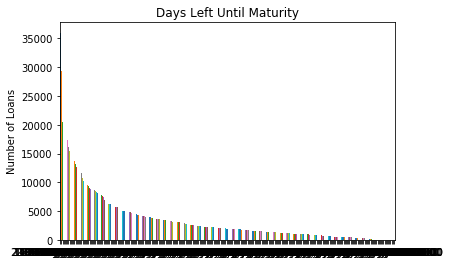

2191 days    36003
2160 days    29398
1461 days    20524
1977 days    20256
1826 days    20173
2192 days    19632
1946 days    17270
1614 days    16173
1795 days    15512
2130 days    14969
1916 days    14362
1522 days    13692
1249 days    13622
1583 days    13128
2161 days    12610
1430 days    12582
1553 days    12456
1675 days    12136
1765 days    11577
1400 days    10828
1492 days    10199
1188 days     9838
1645 days     9636
1157 days     9524
1218 days     9281
2007 days     9087
1096 days     8865
1310 days     8806
1369 days     8616
2222 days     8590
             ...  
182 days       268
-61 days       262
-92 days       251
-30 days       245
59 days        243
641 days       236
580 days       235
62 days        204
244 days       186
276 days       138
215 days       138
486 days       127
2283 days      112
2312 days       81
89 days         32
-153 days        9
881 days         6
760 days         5
2341 days        3
820 days         3
-184 days        3
-122 days   

In [17]:
#calculate days left until maturity
df['daystomaturity'] = pd.to_datetime(df['loanmaturitydate'])-pd.to_datetime(df['reportingperiodendingdate'])
draw(df.daystomaturity, title='Days Left Until Maturity', ylabel='Number of Loans', sort=True)

In [18]:
# remove days from the data for machine learning
df['daystomaturity']=df.daystomaturity.map(lambda x: np.nan if pd.isnull(x) else x.days)
# print last five rows
df.daystomaturity.tail()

999995    1795
999996    1946
999997    1857
999998    1795
999999    1826
Name: daystomaturity, dtype: int64

In [19]:
#retaining only loans with non-negative days to maturity
u=pd.value_counts(df.daystomaturity<=0)
if len(u)<2:
    print('No Loans Below zero outstanding days')
else: 
    print('Number of Loans with negative outstanding days :', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with only non-negative outstanding days')
    df=df[df.daystomaturity>0]

Number of Loans with negative outstanding days : 2671
Dropping  2671 rows and retaining loans with only non-negative outstanding days


In [20]:
#number of rows and columns of the dataframe
df.shape

(997329, 89)

In [21]:
# statistics for days to maturity
df.daystomaturity.describe()

count    997329.000000
mean       1505.814987
std         542.817794
min          30.000000
25%        1188.000000
50%        1583.000000
75%        1948.000000
max        6056.000000
Name: daystomaturity, dtype: float64

# Origination date

# Removing loans before origination cutoff date

In [22]:
# remove loans with orgination dates set for cut off earlier
u=pd.value_counts(df.originationdate<=cutOfffForOriginationDate)
if len(u)<2:
    print('No origination date rows fall before ',cutOfffForOriginationDate )
else: 
    print('Number of rows before',cutOfffForOriginationDate ,':', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with origination dates after', cutOfffForOriginationDate)
    df=df[df.originationdate>cutOfffForOriginationDate]
#new number of rows and columns of the dataframe
df.shape

Number of rows before 2012-01-01 : 1575
Dropping  1575 rows and retaining loans with origination dates after 2012-01-01


(995754, 89)

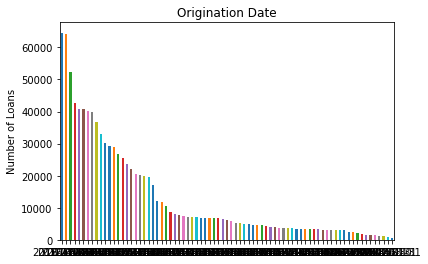

2016-12-31    64574
2016-10-31    64272
2017-01-31    52433
2016-08-31    42772
2016-09-30    40922
2017-04-30    40713
2017-03-31    40303
2017-05-31    39985
2016-11-30    36773
2017-09-30    32881
2017-10-31    30065
2017-08-31    29296
2016-07-31    29048
2017-02-28    26752
2016-05-31    25476
2016-06-30    23716
2017-11-30    22231
2017-07-31    20604
2017-06-30    20330
2018-05-31    19960
2018-04-30    19525
2016-04-30    17206
2016-03-31    12062
2018-03-31    11635
2017-12-31    10692
2015-12-31     8650
2015-10-31     7977
2016-01-31     7806
2014-04-30     7451
2014-03-31     7225
              ...  
2013-04-30     4447
2014-05-31     3857
2014-07-31     3855
2013-02-28     3758
2014-12-31     3746
2013-01-31     3711
2013-10-31     3677
2012-12-31     3507
2013-09-30     3501
2012-03-31     3317
2014-11-30     3290
2014-09-30     3279
2015-01-31     3257
2013-03-31     3119
2018-02-28     3071
2014-06-30     3052
2015-02-28     2923
2014-10-31     2920
2014-02-28     2916


In [23]:
#set origination date as index
#df.set_index(['originationdate'])
# draw origination date chart
draw(df.originationdate, title='Origination Date', ylabel='Number of Loans', sort=True)

In [24]:
# statistics for origination date
df.originationdate.describe()

count         995754
unique            77
top       2016-12-31
freq           64574
Name: originationdate, dtype: object

# CIK Number

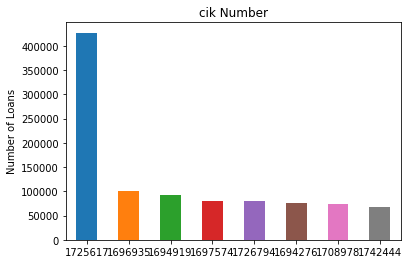

1725617    427244
1696935     99667
1694919     92557
1697574     79235
1726794     79095
1694276     76690
1708978     74104
1742444     67162
Name: cik, dtype: int64


In [25]:
#draw chart using the function above
draw(df.cik, title='cik Number', ylabel='Number of Loans', sort=True)

In [26]:
#dropping cik column
df.drop(['cik'],axis=1, inplace=True)
#new number of rows and columns of the dataframe
df.shape

(995754, 88)

# Accession Number

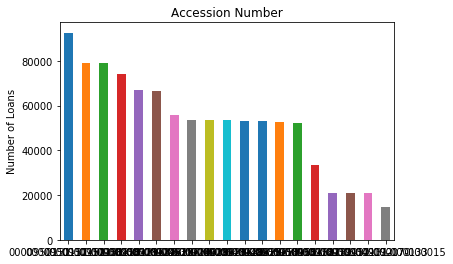

0000950131-17-000068    92557
0000950131-17-000083    79235
0000950131-18-000011    79095
0000950131-18-000048    74104
0000950123-18-006317    67162
0000950131-17-000040    66363
0000929638-18-000030    55710
0000929638-18-000431    53447
0000929638-18-000483    53443
0000929638-18-000552    53442
0000929638-18-000589    53195
0000929638-18-000653    52911
0000929638-18-000727    52669
0000929638-18-000790    52427
0000950131-18-000049    33304
0000950131-17-000092    20737
0000950131-17-000070    20737
0000950131-17-000133    20737
0000950131-17-000015    14479
Name: accessionnumber, dtype: int64


In [27]:
# draw chart for accession number
draw(df.accessionnumber, title='Accession Number', ylabel='Number of Loans', sort=True)

In [28]:
# drop accession number column
df.drop(['accessionnumber'],axis=1, inplace=True)
# new number of rows and columns of the dataframe
df.shape

(995754, 87)

# Asset Type Number

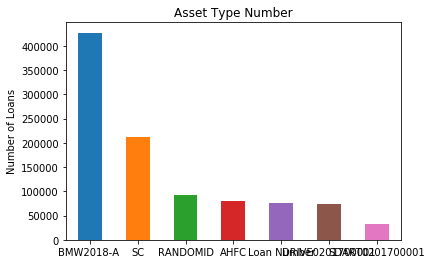

BMW2018-A          427244
SC                 212620
RANDOMID            92557
AHFC                79235
Loan Number         76690
DRIVE0201700001     74104
SDART0201700001     33304
Name: assettypenumber, dtype: int64


In [29]:
# draw chart for asset type number
draw(df.assettypenumber, title='Asset Type Number', ylabel='Number of Loans', sort=True)

In [30]:
# drop asset type number column
df.drop(['assettypenumber'],axis=1, inplace=True)
# new number of rows and columns of the dataframe
df.shape

(995754, 86)

# Reporting Period Beginning Date

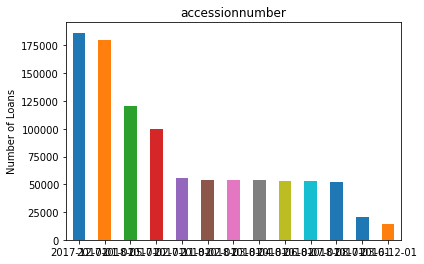

2017-12-01    186503
2017-01-01    179657
2018-05-01    120357
2017-02-01     99972
2017-11-01     55710
2018-02-01     53447
2018-03-01     53443
2018-04-01     53442
2018-06-01     52911
2018-07-01     52669
2018-08-01     52427
2017-03-01     20737
2016-12-01     14479
Name: reportingperiodbeginningdate, dtype: int64


In [31]:
# draw charts for reporting period beginning date
draw(df.reportingperiodbeginningdate, title='accessionnumber', ylabel='Number of Loans', sort=True)

In [32]:
# drop reporting period beginning date column
df.drop(['reportingperiodbeginningdate'],axis=1, inplace=True)
# new number of rows and columns of the dataframe
df.shape

(995754, 85)

# Originators Name

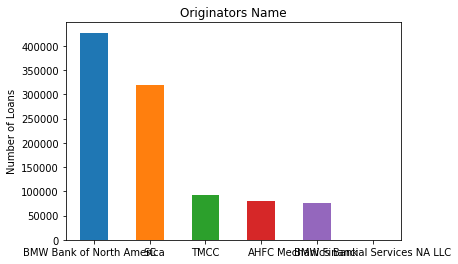

BMW Bank of North America        426891
SC                               320028
TMCC                              92557
AHFC                              79235
Mechanics Bank                    76690
BMW Financial Services NA LLC       353
Name: originatorname, dtype: int64


In [33]:
# draw charts for originators name
draw(df.originatorname, title='Originators Name', ylabel='Number of Loans', sort=True)

# Create Features for Originators

In [34]:
# create feature columns for categories within originator name 
def map_originatorname(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.originatorname).index.tolist()

for code in codes:
        df['originator_{}'.format(code)] = list(map(map_originatorname, df.originatorname))


In [35]:
# drop originator name column
df.drop(['originatorname'],axis=1, inplace=True)
# new number of rows and columns
df.shape

(995754, 90)

# Original Loan Amount

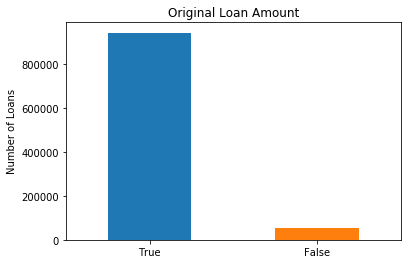

True     943225
False     52529
Name: originalloanamount, dtype: int64


In [36]:
# draw chart for original loan amount as filered in the next variable(original_loan_in_excess) 
original_loan_in_excess = 10000
draw(df.originalloanamount>original_loan_in_excess, title='Original Loan Amount', ylabel='Number of Loans', sort=True)

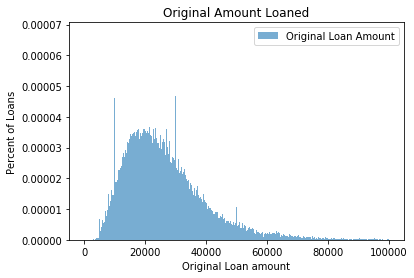

In [37]:
#draw a chart to view distribution of original loan amount
bins = np.linspace(0, 100000, 1000)
plt.hist(df.originalloanamount, bins, alpha=0.6, density=True, label='Original Loan Amount')
plt.legend(loc='upper right')
plt.title("Original Amount Loaned")
plt.xlabel('Original Loan amount')
plt.ylabel('Percent of Loans')
plt.show()

In [38]:
# get statistics for original loan amount
df.originalloanamount.describe()

count    995754.00000
mean      26788.92177
std       14201.28015
min        1624.63000
25%       16920.88500
50%       24012.50000
75%       33218.55750
max      189984.12000
Name: originalloanamount, dtype: float64

In [39]:
# To remove rows with zero, non-negative or blank values for original loan amount

u=pd.value_counts(df.originalloanamount<=0)
if len(u)<2:
    print('No original loan amount blank or below zero')
else: 
    print('Number of original loan amount rows blank or below zero',':', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with original loan amount more than zero')
    df=df[df.originalloanamount>0]
df.shape

No original loan amount blank or below zero


(995754, 90)

# Original Loan Term

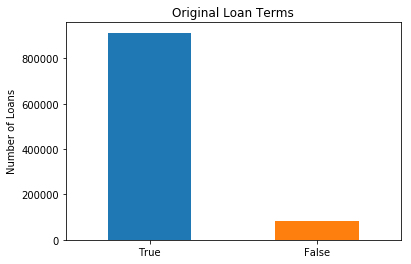

True     913035
False     82719
Name: originalloanterm, dtype: int64


In [40]:
# draw chart for original loan term based on the input of variable below(original_loan_term_excess)
original_loan_term_excess = 48
draw(df.originalloanterm>original_loan_term_excess, title='Original Loan Terms', ylabel='Number of Loans',sort=True)

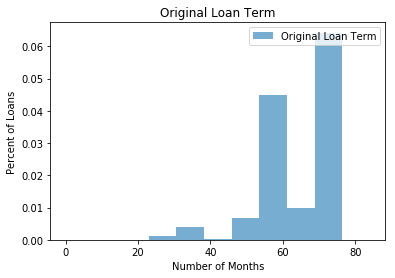

In [41]:
#chart for the distribution of original loan term
bins = np.linspace(0, 84, 12)
plt.hist(df.originalloanterm, bins, alpha=0.6, density=True, label='Original Loan Term')
plt.legend(loc='upper right')
plt.title("Original Loan Term")
plt.xlabel('Number of Months')
plt.ylabel('Percent of Loans')
plt.show()

In [42]:
#statistics for original loan term
df.originalloanterm.describe()

count    995754.000000
mean         64.608213
std           9.537029
min          12.000000
25%          60.000000
50%          66.000000
75%          72.000000
max          75.000000
Name: originalloanterm, dtype: float64

In [43]:
# remove rows with zero, blank or negative original loan term

u=pd.value_counts(df.originalloanterm<=0)
if len(u)<2:
    print('No original loan term blank or below zero')
else: 
    print('Number of original loan term rows blank or below zero',':', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with original loan term more than zero')
    df=df[df.originalloanterm>0]
# new number of rows and columns of the dataframe
df.shape

No original loan term blank or below zero


(995754, 90)

# Original interest rate percentage

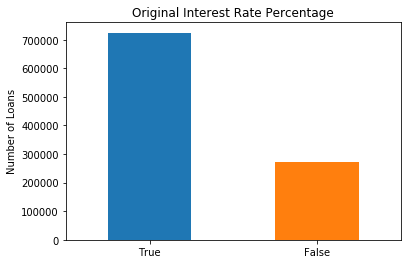

True     724342
False    271412
Name: originalinterestratepercentage, dtype: int64


In [44]:
# draw a chart with a filter input as below (originalinterestratepercentage_excess)
originalinterestratepercentage_excess = 2.0
draw(df.originalinterestratepercentage<originalinterestratepercentage_excess, title='Original Interest Rate Percentage', ylabel='Number of Loans',sort=True)

In [45]:
# get statistices for originalinterestratepercentage
#df.originalinterestratepercentage.describe()

In [46]:
# drop rows with blank or negative original interest rate percentage and research on zero interest rate loans
u=pd.value_counts(df.originalinterestratepercentage<0)
if len(u)<2:
    print('No original interest rate blank or below zero')
else: 
    print('Number of original interest rate rows blank or below zero',':', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with original interest rate with non-negative values')
    df=df[df.originalinterestratepercentage>=0]
df.shape

No original interest rate blank or below zero


(995754, 90)

# No interest rate loans

In [47]:
# view zero original interest rate percentage loans
u=pd.value_counts(df.originalinterestratepercentage==0)
if len(u)<2:
    print('No zero original interest rate percentage')
else: 
    print('Number of zero original interest rate rows',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with original interest rate with non-negative values')
    #df=df[df.originalinterestratepercentage>=0]
df.shape

Number of zero original interest rate rows : 35503


(995754, 90)

# Underwriting Indicator

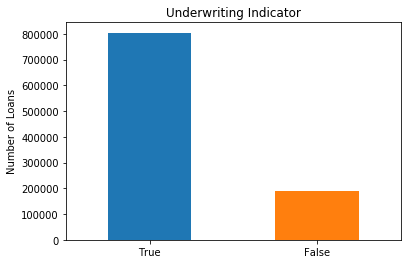

True     804492
False    191262
Name: underwritingindicator, dtype: int64


In [48]:
draw(df.underwritingindicator, title='Underwriting Indicator', ylabel='Number of Loans', sort=True)

# Create Feature Column for Underwriting TRUE

In [49]:
def map_underwriting_true(*args):
    columns = [col for col in args]
    for column in columns:
        if column == True:
            return 1
        elif column == False:
            return 0
        
df['underwriting_true'] = list(map(map_underwriting_true, df.underwritingindicator))
df.drop(['underwritingindicator'], axis=1, inplace=True)
pd.value_counts(df.underwriting_true)

1    804492
0    191262
Name: underwriting_true, dtype: int64

# Subvented

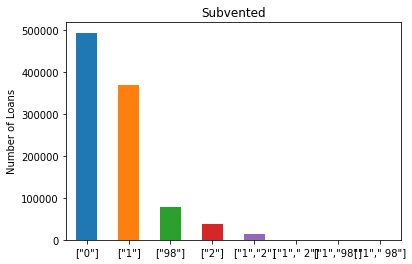

["0"]          494290
["1"]          370211
["98"]          79104
["2"]           38718
["1","2"]       12817
["1"," 2"]        590
["1","98"]         14
["1"," 98"]        10
Name: subvented, dtype: int64


In [50]:
draw(df.subvented, title='Subvented', ylabel='Number of Loans', sort=True)

In [51]:
df.subvented.describe(include='all')

count     995754
unique         8
top        ["0"]
freq      494290
Name: subvented, dtype: object

# Create Feature Column for Subvented

In [52]:
def map_subvented_true(*args):
    columns = [col for col in args]
    for column in columns:
        if column == '["0"]':
            return 0
        else:
            return 1
        
df['subvented_true'] = list(map(map_subvented_true, df.subvented))
df.drop(['subvented'], axis=1, inplace=True)
pd.value_counts(df.subvented_true)

1    501464
0    494290
Name: subvented_true, dtype: int64

# Vehicle New or Used code

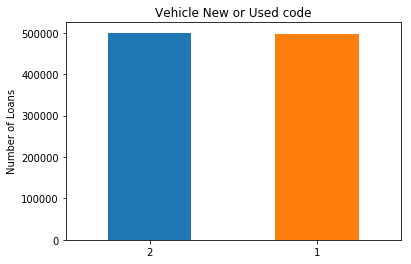

2    500012
1    495742
Name: vehiclenewusedcode, dtype: int64


In [53]:
draw(df.vehiclenewusedcode, title='Vehicle New or Used code', ylabel='Number of Loans', sort=True)

# Create Feature Column for New or Used

In [54]:
def map_vehiclenewusedcode_true(*args):
    columns = [col for col in args]
    for column in columns:
        if column == 1:
            return 1
        else:
            return 0
        
df['vehiclenew_true'] = list(map(map_vehiclenewusedcode_true, df.vehiclenewusedcode))
df.drop(['vehiclenewusedcode'], axis=1, inplace=True)
pd.value_counts(df.vehiclenew_true)

0    500012
1    495742
Name: vehiclenew_true, dtype: int64

# Vehicle Type code

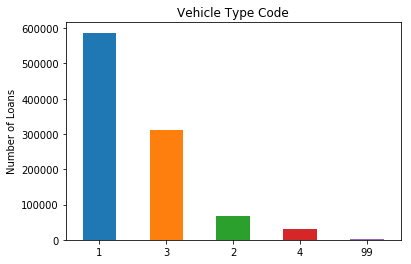

1     587023
3     309839
2      66089
4      31419
99      1384
Name: vehicletypecode, dtype: int64


In [55]:
draw(df.vehicletypecode, title='Vehicle Type Code', ylabel='Number of Loans', sort=True)

In [56]:
df.vehicletypecode.describe()

count    995754.000000
mean          1.919560
std           3.754734
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max          99.000000
Name: vehicletypecode, dtype: float64

In [57]:
df.drop(['vehicletypecode'],axis=1, inplace=True)
df.shape

(995754, 89)

# Obligor Credit Score Type

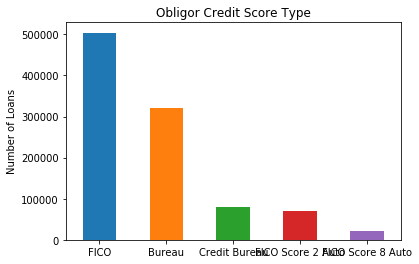

FICO                 503934
Bureau               320028
Credit Bureau         79235
FICO Score 2 Auto     70807
FICO Score 8 Auto     21750
Name: obligorcreditscoretype, dtype: int64


In [58]:
draw(df.obligorcreditscoretype, title='Obligor Credit Score Type', ylabel='Number of Loans', sort=True)

In [59]:
df.obligorcreditscoretype.describe()

count     995754
unique         5
top         FICO
freq      503934
Name: obligorcreditscoretype, dtype: object

In [60]:
pd.value_counts(df.obligorcreditscoretype==0)

False    995754
Name: obligorcreditscoretype, dtype: int64

# Create features for obligator credit score type

In [61]:
def map_obligorcreditscoretype(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.obligorcreditscoretype).index.tolist()

for code in codes:
        df['credit_type_{}'.format(code)] = list(map(map_obligorcreditscoretype, df.obligorcreditscoretype))


In [62]:
df.drop(['obligorcreditscoretype'], axis=1, inplace=True)
df.shape

(995754, 93)

# Obligor Credit Score

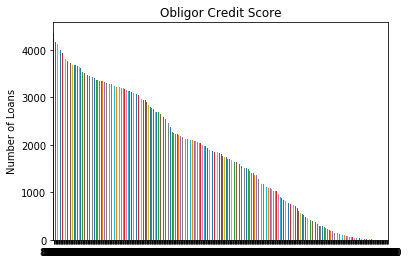

825.0    4359
677.0    4266
818.0    4183
827.0    4171
817.0    4169
831.0    4161
826.0    4131
824.0    4123
816.0    4087
830.0    4040
834.0    4010
828.0    3994
833.0    3981
805.0    3935
822.0    3923
815.0    3902
836.0    3845
814.0    3819
820.0    3812
812.0    3810
853.0    3787
821.0    3784
842.0    3770
705.0    3758
832.0    3756
747.0    3742
837.0    3740
823.0    3732
738.0    3731
810.0    3727
         ... 
399.0      10
397.0       7
402.0       7
389.0       7
398.0       7
395.0       7
393.0       6
385.0       5
384.0       5
391.0       4
387.0       4
396.0       3
374.0       3
380.0       3
378.0       3
383.0       3
373.0       2
370.0       2
381.0       1
390.0       1
377.0       1
375.0       1
386.0       1
372.0       1
371.0       1
388.0       1
366.0       1
363.0       1
359.0       1
382.0       1
Name: obligorcreditscore, Length: 533, dtype: int64


In [63]:
draw(df.obligorcreditscore, title='Obligor Credit Score', ylabel='Number of Loans', sort=True)

In [64]:
df.obligorcreditscore.describe()

count    952276.000000
mean        717.066552
std         106.921404
min           0.000000
25%         639.000000
50%         730.000000
75%         806.000000
max         900.000000
Name: obligorcreditscore, dtype: float64

In [65]:
u=pd.value_counts(df.obligorcreditscore<=0)
if len(u)<2:
    print('No blank or zero or negative credit score')
else: 
    print('Number of loans with no credit score',':', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with credit score')
    df=df[df.obligorcreditscore>0]
df.shape

Number of loans with no credit score : 660
Dropping  660 rows and retaining loans with credit score


(951616, 93)

# Obligor Income Verification Level Code

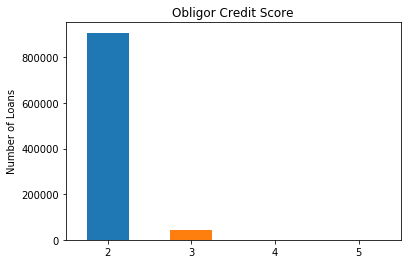

2    907562
3     43947
4        90
5        17
Name: obligorincomeverificationlevelcode, dtype: int64


In [66]:
draw(df.obligorincomeverificationlevelcode, title='Obligor Credit Score', ylabel='Number of Loans', sort=True)

In [67]:
df.obligorincomeverificationlevelcode.describe()

count    951616.000000
mean          2.046424
std           0.211105
min           2.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           5.000000
Name: obligorincomeverificationlevelcode, dtype: float64

In [68]:
u=pd.value_counts(df.obligorincomeverificationlevelcode<=0)
if len(u)<2:
    print('No blank or zero obligor income verification level code')
else: 
    print('Number of loans with no obligor income verification level code',':', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with obligor income verification level code')
    df=df[df.obligorincomeverificationlevelcode>0]
df.shape

No blank or zero obligor income verification level code


(951616, 93)

# Create Feature Columns for Obligor Income Verification Code 2,3,4 and 5

In [69]:
def map_obligorincomeverificationlevelcode(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.obligorincomeverificationlevelcode).index.tolist()

for code in codes:
        df['income_code{}'.format(code)] = list(map(map_obligorincomeverificationlevelcode, df.obligorincomeverificationlevelcode))


In [70]:
df.drop(['obligorincomeverificationlevelcode'], axis=1, inplace=True)

# Obligor Employment Verification Code

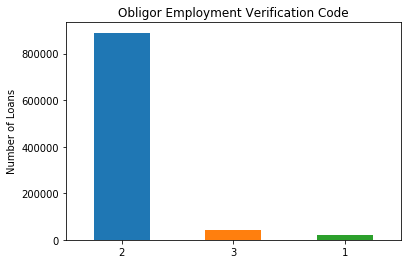

2    889602
3     43230
1     18784
Name: obligoremploymentverificationcode, dtype: int64


In [71]:
draw(df.obligoremploymentverificationcode, title='Obligor Employment Verification Code', ylabel='Number of Loans', sort=True)

In [72]:
#pd.value_counts(df.obligoremploymentverificationcode==0)

In [73]:
df.obligoremploymentverificationcode.describe()

count    951616.000000
mean          2.025689
std           0.253983
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: obligoremploymentverificationcode, dtype: float64

In [74]:
u=pd.value_counts(df.obligoremploymentverificationcode<=0)
if len(u)<2:
    print('No blank or zero obligor employment verification level code')
else: 
    print('Number of loans with no obligor employment verification level code',':', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with obligor employment verification level code')
    df=df[df.obligoremploymentverificationcode>0]
df.shape

No blank or zero obligor employment verification level code


(951616, 96)

# Create feature Columns for obligor employment verification code 1,2 and 3

In [75]:
def map_obligoremploymentverificationcode(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.obligoremploymentverificationcode).index.tolist()

for code in codes:
        df['empl_code{}'.format(code)] = list(map(map_obligoremploymentverificationcode, df.obligoremploymentverificationcode))


In [76]:
df.drop(['obligoremploymentverificationcode'], axis=1, inplace=True)

# Co-obligator Indicator

In [77]:
df.coobligorindicator.describe()

count     951616
unique         2
top        False
freq      667030
Name: coobligorindicator, dtype: object

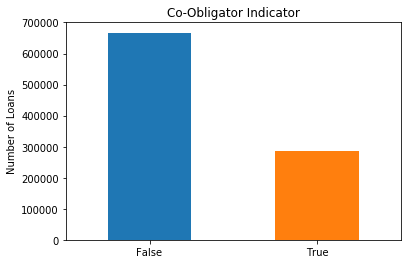

False    667030
True     284586
Name: coobligorindicator, dtype: int64


In [78]:
draw(df.coobligorindicator, title='Co-Obligator Indicator', ylabel='Number of Loans', sort=True)

# Create features for Co-obligator Indicator True

In [79]:
def map_coobligorindicator_true(*args):
    columns = [col for col in args]
    for column in columns:
        if column == 1:
            return 1
        else:
            return 0
        
df['coobligorindicator_true'] = list(map(map_coobligorindicator_true, df.coobligorindicator))
df.drop(['coobligorindicator'], axis=1, inplace=True)
pd.value_counts(df.coobligorindicator_true)

0    667030
1    284586
Name: coobligorindicator_true, dtype: int64

# Reporting Period Actual End Balance Amount

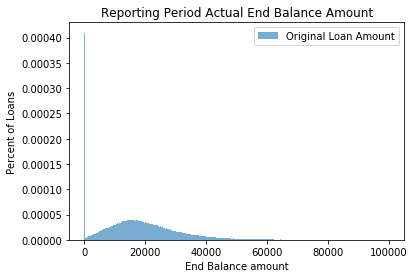

In [80]:
bins = np.linspace(0, 100000, 1000)
plt.hist(df.reportingperiodactualendbalanceamount, bins, alpha=0.6, density=True, label='Original Loan Amount')
plt.legend(loc='upper right')
plt.title("Reporting Period Actual End Balance Amount")
plt.xlabel('End Balance amount')
plt.ylabel('Percent of Loans')
plt.show()

In [81]:
#draw(df.reportingperiodactualendbalanceamount, title='Reporting Period Actual End Balance Amount', ylabel='Number of Loans', sort=True)

In [82]:
df.reportingperiodactualendbalanceamount.describe()

count    951616.000000
mean      19770.364366
std       12463.940996
min           0.000000
25%       11465.480000
50%       18059.455000
75%       26088.672500
max      177603.400000
Name: reportingperiodactualendbalanceamount, dtype: float64

In [83]:
u=pd.value_counts(df.reportingperiodactualendbalanceamount<=0)
if len(u)<2:
    print('No blank or zero or negative reporting period actual end balance amount')
else: 
    print('Number of loans with no reporting period actual end balance amount',':', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with reporting period actual end balance amount')
    df=df[df.reportingperiodactualendbalanceamount>0]
df.shape

Number of loans with no reporting period actual end balance amount : 38525
Dropping  38525 rows and retaining loans with reporting period actual end balance amount


(913091, 98)

# Total Actual amount paid

In [84]:
df.totalactualamountpaid.describe()

count    913091.000000
mean        492.198000
std         710.884694
min      -72031.970000
25%         284.840000
50%         436.000000
75%         608.000000
max       74182.000000
Name: totalactualamountpaid, dtype: float64

In [85]:
u=pd.value_counts(df.totalactualamountpaid<=0)
if len(u)<2:
    print('No blank or zero or negative total actual amount paid')
else: 
    print('Number of loans with no or negative total actual amount paid',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with positive total actual amount paid')
    #df=df[df.totalactualamountpaid>0]
df.shape

Number of loans with no or negative total actual amount paid : 139899


(913091, 98)

# Actual interest collected amount

In [86]:
df.actualinterestcollectedamount.describe()

count    913091.000000
mean         89.803571
std         136.527782
min       -1303.820000
25%           9.930000
50%          37.240000
75%         104.390000
max        3447.000000
Name: actualinterestcollectedamount, dtype: float64

In [87]:
u=pd.value_counts(df.actualinterestcollectedamount<=0)
if len(u)<2:
    print('No blank or zero actual interest collected amount')
else: 
    print('Number of loans with no or negative actual interest collected amount',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with positive actual interest collected amount')
    #df=df[df.actualinterestcollectedamount>0]
df.shape

Number of loans with no or negative actual interest collected amount : 173611


(913091, 98)

# Actual principal collected amount

In [88]:
df.actualprincipalcollectedamount.describe()

count    913091.000000
mean        404.455861
std         703.709184
min      -72031.970000
25%         141.100000
50%         346.180000
75%         527.050000
max       74001.130000
Name: actualprincipalcollectedamount, dtype: float64

In [89]:
u=pd.value_counts(df.actualprincipalcollectedamount<=0)
if len(u)<2:
    print('No blank or zero actual principal collected amount')
else: 
    print('Number of loans with zero or negative actual principal collected amount',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with positive actual principal collected amount')
    #df=df[df.actualprincipalcollectedamount>0]
df.shape

Number of loans with zero or negative actual principal collected amount : 165657


(913091, 98)

# Interest paid through date

In [90]:
pd.value_counts(df.interestpaidthroughdate)

1900-01-01    34476
2017-12-15    10044
2017-12-01     7279
2017-12-08     6844
2017-12-29     6602
2017-02-01     6524
2017-12-14     6183
2017-12-04     5648
2017-12-05     5619
2017-12-22     5616
2017-12-11     5303
2017-02-10     5249
2017-01-20     5237
2017-02-28     5139
2017-12-07     5122
2017-12-12     5118
2017-12-13     5103
2017-02-15     5015
2017-01-17     4722
2017-01-27     4706
2017-12-06     4615
2017-01-13     4566
2017-02-03     4557
2017-02-17     4423
2017-12-28     4389
2017-11-30     4386
2018-02-28     4297
2018-05-25     4297
2017-01-10     4283
2017-01-31     4265
              ...  
2015-08-29        1
2014-04-13        1
2018-12-03        1
2019-08-05        1
2021-01-03        1
2016-06-25        1
2016-07-05        1
2016-01-20        1
2015-10-14        1
2016-07-14        1
2015-03-05        1
2016-05-20        1
2016-02-27        1
2019-06-05        1
2016-09-19        1
2019-07-11        1
2020-02-17        1
2018-09-27        1
2015-05-28        1


In [91]:
df.interestpaidthroughdate.describe()

count         850038
unique          1084
top       1900-01-01
freq           34476
Name: interestpaidthroughdate, dtype: object

In [92]:
u=pd.value_counts(df.interestpaidthroughdate=='1900-01-01')
if len(u)<2:
    print('No blank or zero interest paid throughdate as 1900-01-01')
else: 
    print('Number of loans with zero or 1900-01-01 as  interest paid throughdate',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with correct interest paid throughdate')
    #df=df[df.interestpaidthroughdate>'1900-01-01']
df.shape

Number of loans with zero or 1900-01-01 as  interest paid throughdate : 34476


(913091, 98)

In [93]:
df.drop(['interestpaidthroughdate'], axis=1, inplace=True)
df.shape

(913091, 97)

# Days from origination to first payment date

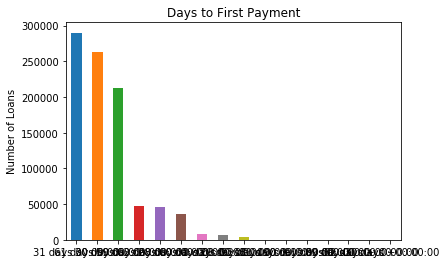

31 days     289951
61 days     262278
30 days     212087
59 days      47493
62 days      45962
28 days      35672
60 days       7772
0 days        7277
29 days       4323
92 days        106
-31 days        58
90 days         47
91 days         35
89 days         20
-62 days         6
-30 days         4
Name: daystofirstpayment, dtype: int64


In [94]:
df['daystofirstpayment'] = pd.to_datetime(df['originalfirstpaymentdate'])-pd.to_datetime(df['originationdate'])
#draw a chart for visual look and analysis
draw(df.daystofirstpayment, title='Days to First Payment', ylabel='Number of Loans', sort = True)


In [95]:
df.daystofirstpayment.describe()

count                     913091
mean     42 days 06:48:38.690031
std      15 days 09:24:08.745595
min           -62 days +00:00:00
25%             30 days 00:00:00
50%             31 days 00:00:00
75%             61 days 00:00:00
max             92 days 00:00:00
Name: daystofirstpayment, dtype: object

In [96]:
#remove days string for machine learning
df['daystofirstpayment']=df.daystofirstpayment.map(lambda x: np.nan if pd.isnull(x) else x.days)
#display last five rows
df.daystofirstpayment.tail()

999994    62
999995    31
999996    31
999998    31
999999    31
Name: daystofirstpayment, dtype: int64

In [97]:
u=pd.value_counts(df.daystofirstpayment==0)
if len(u)<2:
    print('No blank or zero days to first payment')
else: 
    print('Number of loans with zero days to first payment',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with positive total actual amount paid')
    #df=df[df.daystofirstpayment>0]
df.shape

Number of loans with zero days to first payment : 7277


(913091, 98)

In [98]:
df.drop(['originalfirstpaymentdate'], axis=1, inplace=True)
df.shape

(913091, 97)

# Grace Period

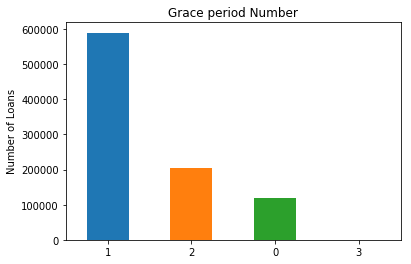

1    589807
2    204364
0    118712
3       208
Name: graceperiodnumber, dtype: int64


In [99]:
draw(df.graceperiodnumber, title='Grace period Number', ylabel='Number of Loans', sort = True)

In [100]:
df.graceperiodnumber.describe()

count    913091.000000
mean          1.094260
std           0.588093
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: graceperiodnumber, dtype: float64

In [101]:
u=pd.value_counts(df.graceperiodnumber==0)
if len(u)<2:
    print('No blank or zero grace period number')
else: 
    print('Number of loans with zero grace period number',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with positive grace period number')
    #df=df[df.graceperiodnumber>0]
df.shape

Number of loans with zero grace period number : 118712


(913091, 97)

# Asset added indicator

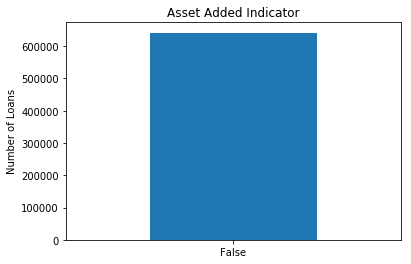

False    641725
Name: assetaddedindicator, dtype: int64


In [102]:
draw(df.assetaddedindicator, title='Asset Added Indicator', ylabel='Number of Loans', sort = True)

In [103]:
df.assetaddedindicator.describe()

count     641725
unique         1
top        False
freq      641725
Name: assetaddedindicator, dtype: object

In [104]:
u=pd.value_counts(df.assetaddedindicator!=False)
if len(u)<2:
    print('No blank or zero Asset Added Indicator')
else: 
    print('Number of loans with zero or blank Asset Added Indicator',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with positive asset added indicator')
    #df=df[df.assetaddedindicator>0]
df.shape

Number of loans with zero or blank Asset Added Indicator : 271366


(913091, 97)

In [105]:
df.drop(['assetaddedindicator'], axis=1, inplace=True)
df.shape

(913091, 96)

# Reporting Period Modification Indicator

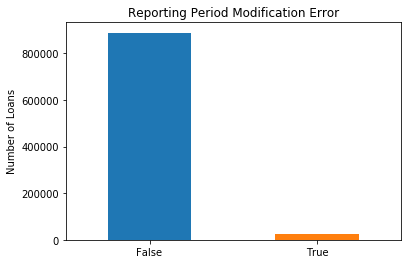

False    888294
True      24797
Name: reportingperiodmodificationindicator, dtype: int64


In [106]:
draw(df.reportingperiodmodificationindicator, title='Reporting Period Modification Error', ylabel='Number of Loans', sort = True)

In [107]:
df.reportingperiodmodificationindicator.describe()

count     913091
unique         2
top        False
freq      888294
Name: reportingperiodmodificationindicator, dtype: object

# Create Features for Reporting Period Modification Indicator True

In [108]:
def map_reportingperiodmodificationindicator_true(*args):
    columns = [col for col in args]
    for column in columns:
        if column == 1:
            return 1
        else:
            return 0
        
df['reportingperiodmodificationindicator_true'] = list(map(map_reportingperiodmodificationindicator_true, df.reportingperiodmodificationindicator))
df.drop(['reportingperiodmodificationindicator'], axis=1, inplace=True)
pd.value_counts(df.reportingperiodmodificationindicator_true)

0    888294
1     24797
Name: reportingperiodmodificationindicator_true, dtype: int64

In [109]:
df.shape

(913091, 96)

# Servicing Advance Method Code

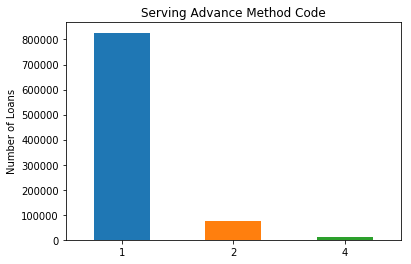

1    827049
2     75787
4     10255
Name: servicingadvancemethodcode, dtype: int64


In [110]:
draw(df.servicingadvancemethodcode, title='Serving Advance Method Code', ylabel='Number of Loans', sort = True)

In [111]:
df.servicingadvancemethodcode.describe()

count    913091.000000
mean          1.116694
std           0.412872
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           4.000000
Name: servicingadvancemethodcode, dtype: float64

# Create Feature Columns for Servicing Advance Method Codes

In [112]:
def map_servicingadvancemethodcode(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.servicingadvancemethodcode).index.tolist()

for code in codes:
        df['servicingadvancemethod_code{}'.format(code)] = list(map(map_servicingadvancemethodcode, df.servicingadvancemethodcode))


In [113]:
df.drop(['servicingadvancemethodcode'], axis=1, inplace=True)
df.shape

(913091, 98)

# Other Principal Adjustment Amount

In [114]:
df.otherprincipaladjustmentamount.describe()

count    913091.000000
mean         35.557263
std         527.207743
min      -72031.970000
25%           0.000000
50%           0.000000
75%           0.000000
max       72995.280000
Name: otherprincipaladjustmentamount, dtype: float64

In [115]:
u=pd.value_counts(df.otherprincipaladjustmentamount!=True)
if len(u)<2:
    print('No blank other principal adjustment amount')
else: 
    print('Number of loans with zero other principal adjustment amount',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with other principal adjustment amount')
    #df=df[df.otherprincipaladjustmentamount>0]
df.shape

Number of loans with zero other principal adjustment amount : 912933


(913091, 98)

# Zero Balance Effective Date

In [116]:
df.zerobalanceeffectivedate.describe()


count            960
unique            10
top       2018-01-31
freq             174
Name: zerobalanceeffectivedate, dtype: object

In [117]:
# Creating new feature column for zero balance effective date

In [118]:
for i in pd.value_counts(df.zerobalanceeffectivedate).keys().tolist():
    if i>cutOfffForOriginationDate:
        df['zerobalanceeffectivedate_calc'] = pd.to_datetime(df['zerobalanceeffectivedate'])-pd.to_datetime(df['originationdate'])
df['zerobalanceeffectivedate_calc']=df.zerobalanceeffectivedate_calc.map(lambda x: np.nan if pd.isnull(x) else x.days)
#df.zerobalanceeffectivedate_calc.replace(np.nan, 0, inplace = True)

In [119]:
df.zerobalanceeffectivedate_calc.describe()

count     960.000000
mean      502.228125
std       315.089168
min        30.000000
25%       274.000000
50%       485.000000
75%       639.000000
max      1916.000000
Name: zerobalanceeffectivedate_calc, dtype: float64

In [120]:
# fill NaN values with zeros
df.zerobalanceeffectivedate_calc.replace(np.nan, 0, inplace = True)

In [121]:
df.drop(['zerobalanceeffectivedate'], axis=1, inplace=True)
df.shape

(913091, 98)

# Zero Balance Code

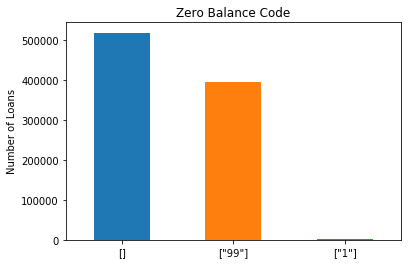

[]        518290
["99"]    393841
["1"]        960
Name: zerobalancecode, dtype: int64


In [122]:
draw(df.zerobalancecode, title='Zero Balance Code', ylabel='Number of Loans', sort = True)

# Create feature column for zero balance code

In [123]:
def map_zerobalancecode(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.zerobalancecode).index.tolist()

for code in codes:
        df['zerobalance_code{}'.format(code)] = list(map(map_zerobalancecode, df.zerobalancecode))


In [124]:
df.shape

(913091, 101)

In [125]:
df.drop(['zerobalancecode'], axis=1, inplace=True)
df.shape

(913091, 100)

In [126]:
drop_list = [
    'assetnumber',
 'reportingperiodendingdate',
 'loanmaturitydate',
 'interestcalculationtypecode',
 'originalinterestratetypecode',
 'originalinterestonlytermnumber',
# #'originalfirstpaymentdate',
# #'graceperiodnumber',
 'paymenttypecode',
 'vehiclemanufacturername',
 'vehiclemodelname',
 'vehiclemodelyear',
 'vehiclevalueamount',
 'vehiclevaluesourcecode',
 'obligorgeographiclocation',
 ##'assetaddedindicator',
 'remainingtermtomaturitynumber',
 ##'reportingperiodmodificationindicator',
 ##'servicingadvancemethodcode',
 'servicingflatfeeamount',
 'otherservicerfeeretainedbyservicer',
 'otherassesseduncollectedservicerfeeamount',
 ##'otherprincipaladjustmentamount',
 'actualothercollectedamount',
 'serviceradvancedamount',
 ##'zerobalanceeffectivedate',
 ##'zerobalancecode',
 'primaryloanservicername',
 'mostrecentservicingtransferreceiveddate',
 'assetsubjectdemandindicator',
 'assetsubjectdemandstatuscode',
 'repurchaseamount',
 'demandresolutiondate',
 'repurchasername',
 'repurchasereplacementreasoncode',
 'chargedoffprincipalamount',
 'recoveredamount',
 'modificationtypecode',
 'paymentextendednumber',
 'repossessedindicator',
 'repossessedproceedsamount'
 ]

In [127]:
# for i in drop_list[:]:
#     print(i, pd.value_counts(df[i]))

In [128]:
df.drop(drop_list,axis=1, inplace=True)


In [129]:
df.shape
df.columns.tolist()

['originationdate',
 'originalloanamount',
 'originalloanterm',
 'originalinterestratepercentage',
 'graceperiodnumber',
 'obligorcreditscore',
 'paymenttoincomepercentage',
 'reportingperiodbeginningloanbalanceamount',
 'nextreportingperiodpaymentamountdue',
 'reportingperiodinterestratepercentage',
 'nextinterestratepercentage',
 'servicingfeepercentage',
 'scheduledinterestamount',
 'scheduledprincipalamount',
 'otherprincipaladjustmentamount',
 'reportingperiodactualendbalanceamount',
 'reportingperiodscheduledpaymentamount',
 'totalactualamountpaid',
 'actualinterestcollectedamount',
 'actualprincipalcollectedamount',
 'currentdelinquencystatus',
 'reportingperiodending_2017-12-31',
 'reportingperiodending_2017-01-31',
 'reportingperiodending_2018-05-31',
 'reportingperiodending_2017-02-28',
 'reportingperiodending_2017-11-30',
 'reportingperiodending_2018-02-28',
 'reportingperiodending_2018-03-31',
 'reportingperiodending_2018-04-30',
 'reportingperiodending_2018-06-30',
 'repor

In [130]:
df.set_index('originationdate')

,originalloanamount,originalloanterm,originalinterestratepercentage,graceperiodnumber,obligorcreditscore,paymenttoincomepercentage,reportingperiodbeginningloanbalanceamount,nextreportingperiodpaymentamountdue,reportingperiodinterestratepercentage,nextinterestratepercentage,...,coobligorindicator_true,daystofirstpayment,reportingperiodmodificationindicator_true,servicingadvancemethod_code1,servicingadvancemethod_code2,servicingadvancemethod_code4,zerobalanceeffectivedate_calc,zerobalance_code[],"zerobalance_code[""99""]","zerobalance_code[""1""]"
originationdate,,,,,,,,,,,,,,,,,,,,,
2012-12-31,25124.50,72,3.2900,0,812.0,2.660000,4850.55,0.00,3.3423,3.3423,...,0,31,0,1,0,0,0.0,0,1,0
2012-12-31,43257.34,72,3.2900,1,817.0,3.990000,8966.77,0.00,3.3416,3.3416,...,0,59,0,1,0,0,0.0,0,1,0
2012-12-31,56917.54,72,3.2900,1,818.0,6.970000,12817.43,0.00,3.3450,3.3450,...,0,59,0,1,0,0,0.0,0,1,0
2012-12-31,42003.57,72,3.2900,1,791.0,2.960000,8798.55,0.00,3.3424,3.3424,...,0,31,0,1,0,0,0.0,0,1,0
2012-12-31,77217.85,72,3.2900,1,712.0,10.370000,17477.67,0.00,3.3449,3.3449,...,0,59,0,1,0,0,0.0,0,1,0
2012-12-31,27784.19,72,3.2900,1,747.0,4.630000,6246.50,0.00,3.3415,3.3415,...,0,59,0,1,0,0,0.0,0,1,0
2012-12-31,43397.80,72,3.2900,1,762.0,4.050000,9772.51,0.00,3.3434,3.3434,...,1,59,0,1,0,0,0.0,0,1,0
2013-02-28,49345.92,72,3.1900,0,746.0,7.230000,11841.96,0.00,3.2334,3.2334,...,0,31,0,1,0,0,0.0,0,1,0
2013-02-28,45763.89,66,3.1900,0,694.0,4.650000,7339.30,0.00,3.2334,3.2334,...,1,31,0,1,0,0,0.0,0,1,0


# Clean data

In [131]:
# change columns to lower case and remove prefix to enable pandas to work
#column_list=[x.lower() for x in (column_list)]
#df.columns=df.columns.str.replace('abs_loan.','')
# convert objects to numeric
#df=df.convert_objects(convert_numeric=True)

# Check for null

In [132]:
df.isnull().values.any()

True

# Loan Statistics

In [133]:
df.describe()

,originalloanamount,originalloanterm,originalinterestratepercentage,graceperiodnumber,obligorcreditscore,paymenttoincomepercentage,reportingperiodbeginningloanbalanceamount,nextreportingperiodpaymentamountdue,reportingperiodinterestratepercentage,nextinterestratepercentage,...,coobligorindicator_true,daystofirstpayment,reportingperiodmodificationindicator_true,servicingadvancemethod_code1,servicingadvancemethod_code2,servicingadvancemethod_code4,zerobalanceeffectivedate_calc,zerobalance_code[],"zerobalance_code[""99""]","zerobalance_code[""1""]"
count,913091.000000,913091.000000,913091.000000,913091.000000,913091.000000,911149.000000,900616.000000,913091.000000,913091.000000,913091.000000,...,913091.000000,913091.000000,913091.000000,913091.000000,913091.000000,913091.000000,913091.000000,913091.000000,913091.000000,913091.000000
mean,27233.943827,64.614875,1.726464,1.094260,716.068187,2.877614,21011.830254,341.368529,1.741928,1.742096,...,0.301215,42.283781,0.027157,0.905768,0.083000,0.011231,0.528030,0.567621,0.431327,0.001051
std,14118.886418,9.379836,2.516312,0.588093,105.381043,4.699453,12190.447670,469.665171,2.535350,2.535241,...,0.458786,15.391768,0.162541,0.292151,0.275883,0.105380,19.214208,0.495407,0.495262,0.032408
min,1624.630000,12.000000,0.000000,0.000000,359.000000,0.000000,0.000000,-1.300000,0.000000,0.000000,...,0.000000,-62.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17494.000000,60.000000,0.121900,1.000000,637.000000,0.076056,12597.082500,0.000000,0.119600,0.120100,...,0.000000,30.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24556.500000,65.000000,0.900000,1.000000,728.000000,0.151350,18934.855000,231.850000,0.903000,0.903000,...,0.000000,31.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,33598.480000,72.000000,2.900000,1.000000,805.000000,4.610000,26957.792500,530.040000,2.936200,2.936200,...,1.000000,61.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,189984.120000,75.000000,22.990000,3.000000,900.000000,96.950000,180707.380000,13589.950000,22.990000,22.990000,...,1.000000,92.000000,1.000000,1.000000,1.000000,1.000000,1916.000000,1.000000,1.000000,1.000000


# Current Vs Other Buckets

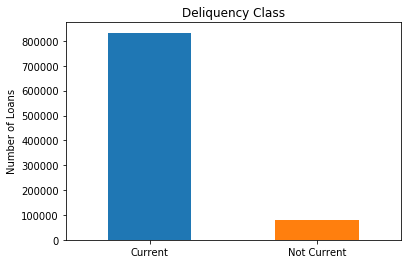

Number of loans Current : 833100     Number of loans Not Current : 79991


In [134]:
LABELS = ('Current', 'Not Current')
count_classes = pd.value_counts(df.currentdelinquencystatus>0, sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2), LABELS)
plt.title('Deliquency Class')
plt.ylabel("Number of Loans")
plt.show()
print('Number of loans Current :', count_classes[0],'   ', 'Number of loans Not Current :', count_classes[1],)

In [135]:
#pd.value_counts(df.currentdelinquencystatus)

# Label Creation

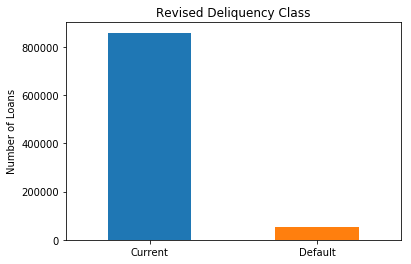

Number of loans Current : 858968     Number of loans Defaulted : 54123


In [136]:
def map_label(*args):
    columns = [col for col in args]
    for column in columns:
        if column > default_months:
            return 1
        elif column <= default_months:
            return 0
        
df['label'] = list(map(map_label, df.currentdelinquencystatus ))

LABELS = ('Current', 'Default')
count_classes = pd.value_counts(df.label, sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2), LABELS)
plt.title('Revised Deliquency Class')
plt.ylabel("Number of Loans")
plt.show()
print('Number of loans Current :', count_classes[0],'   ', 'Number of loans Defaulted :', count_classes[1],)

# Loan Balance Amount at the End of Reporting Period

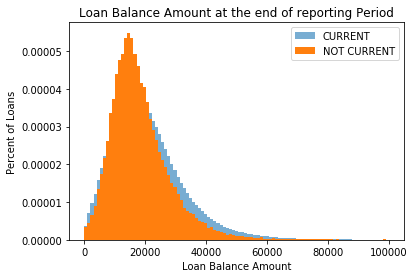

In [137]:
current_df = df[df.label==0]
not_current_df = df[df.label==1]
bins = np.linspace(0, 100000, 100)
plt.hist(current_df.reportingperiodactualendbalanceamount, bins, alpha=0.6, density=True, label='CURRENT')
plt.hist(not_current_df.reportingperiodactualendbalanceamount, bins, alpha=1, density=True, label='NOT CURRENT')
plt.legend(loc='upper right')
plt.title("Loan Balance Amount at the end of reporting Period")
plt.xlabel('Loan Balance Amount')
plt.ylabel('Percent of Loans')
plt.show()

#  Clean up for Machine Learning

In [138]:
df.fillna(0, inplace=True)
df=df.replace([np.inf, -np.inf], np.nan)
df.dropna(inplace=True)
df.drop(['originationdate'], axis=1, inplace=True)
df.head()

,originalloanamount,originalloanterm,originalinterestratepercentage,graceperiodnumber,obligorcreditscore,paymenttoincomepercentage,reportingperiodbeginningloanbalanceamount,nextreportingperiodpaymentamountdue,reportingperiodinterestratepercentage,nextinterestratepercentage,...,daystofirstpayment,reportingperiodmodificationindicator_true,servicingadvancemethod_code1,servicingadvancemethod_code2,servicingadvancemethod_code4,zerobalanceeffectivedate_calc,zerobalance_code[],"zerobalance_code[""99""]","zerobalance_code[""1""]",label
0,25124.50,72,3.29,0,812.0,2.66,4850.55,0.0,3.3423,3.3423,...,31,0,1,0,0,0.0,0,1,0,0
1,43257.34,72,3.29,1,817.0,3.99,8966.77,0.0,3.3416,3.3416,...,59,0,1,0,0,0.0,0,1,0,0
2,56917.54,72,3.29,1,818.0,6.97,12817.43,0.0,3.3450,3.3450,...,59,0,1,0,0,0.0,0,1,0,0
3,42003.57,72,3.29,1,791.0,2.96,8798.55,0.0,3.3424,3.3424,...,31,0,1,0,0,0.0,0,1,0,0
4,77217.85,72,3.29,1,712.0,10.37,17477.67,0.0,3.3449,3.3449,...,59,0,1,0,0,0.0,0,1,0,0


# Preparing data for Machine Learning

In [139]:
# prepare label
Y=df.label.values
Y.shape

(913091,)

In [140]:
# reshape labels for machine learning
Y=Y.reshape(Y.shape[0],1)
Y.shape

(913091, 1)

In [141]:
# prepare input data
input=df.values
input.shape

(913091, 67)

In [142]:
# calculate train/test split
len_train = int(len(input)*train_split)
print(len_train)

821781


In [143]:
# apply train/test split to labels
y_train = Y[0:len_train]
y_test = Y[len_train:]

In [144]:
#drop unneeded columns for creating input data
df.drop(['currentdelinquencystatus','label'], axis=1, inplace=True)

In [145]:
#reshape input data for machine learning
input=input.reshape(input.shape[0], input.shape[1], 1)
input.shape

(913091, 67, 1)

In [146]:
# apply train/test split to input data
x_train = input[0:len_train]
x_test = input[len_train:]

# Normalize input data

In [147]:
x_train_keras_scaled = keras.utils.normalize(x_train, axis=-1, order=2)
x_test_keras_scaled = keras.utils.normalize(x_test, axis=-1, order=2)
x_train_keras_scaled.shape

(821781, 67, 1)

# Model Architecture

In [148]:
model = keras.Sequential()
model.add(keras.layers.GRU(254, activation='relu', input_shape=(x_train_keras_scaled.shape[1:]), return_sequences=True))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.GRU(128, activation='relu'))
model.add(keras.layers.Dropout(0.1))

model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(2, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(lr=1e-3, decay=1e-6)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 67, 254)           195072    
_________________________________________________________________
dropout_1 (Dropout)          (None, 67, 254)           0         
_________________________________________________________________
gru_2 (GRU)                  (None, 128)               147072    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total para

# Model Configuration

In [149]:
#save the best model
#keras.callbacks.Callback()
# checkPoint = ModelCheckpoint(filepath = path+'model/'+name+'.h5',
#                             save_best_only = True,
#                             verbose=0)
# tensorboard = TensorBoard(log_dir=path+'logs/{}'.format(name),
#                           histogram_freq=0,
#                           batch_size=32,
#                           write_graph=True,
#                           write_images=False)
# history = keras.callbacks.History()

# Train the Model

In [150]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.fit(x_train, y_train, epochs=1, validation_data=(x_test_keras_scaled, y_test), batch_size=8, 
        # callbacks = [
   # baseLogger,
    #history,
    #tensorboard
    #learningRateScheduler,
    #reduceLROnPlateau
     #    ], 
          shuffle=False
)


Train on 821781 samples, validate on 91310 samples
Epoch 1/1
357704/821781 [============>.................] - ETA: 2:23:26 - loss: 0.2269 - acc: 0.9859

KeyboardInterrupt: 

# Save the Model

In [ ]:
model.save(path+'model/'+name+'.h5')

In [ ]:
test_loss, test_acc = model.evaluate(x_test_keras_scaled, y_test)
print('Test Loss : ',test_loss,' ','Test Accuracy : ', test_acc)

# Load Saved Model

In [ ]:
#saved_model = load_model(path+'model/ABS_Keras-GRU254GRU128D32D2-adam1540234475.h5')

In [ ]:
# test_loss, test_acc = saved_model.evaluate(x_test_keras_scaled, y_test)
# print('Test Loss : ',test_loss,' ','Test Accuracy : ', test_acc)